In [70]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import copy

In [90]:
# Helper Functions
def plot_signal(signal, xaxis, xl='x-axis', yl='y-axis'):
    if len(xaxis) != len(signal):
        plt.plot(signal)
    else:
        plt.plot(xaxis, signal)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()
    
def get_spec(x, sampling_rate):
    fft_size = len(x)
    xf = np.fft.rfft(x)/fft_size
    freqs = np.linspace(0, sampling_rate//2, fft_size//2+1)
    xfp = np.absolute(xf)
    return freqs, xfp

# Main Algorithms
def linear_corr(sig1, sig2, mode='valid'):
    corr = np.correlate(sig1, sig2, mode=mode)
    return corr

def circular_corr(sig1, sig2): 
    # sig1 and sig2 must have same length
    nom = np.linalg.norm(sig1[:])*np.linalg.norm(sig2[:])
    return np.fft.irfft(np.fft.rfft(sig1)*np.fft.rfft(sig2[::-1]))/nom

def same_len_corr(sig1, sig2, sampling_rate):
    corr = circular_corr(sig1, sig2)
    freq, abs_ = get_spec(corr, sampling_rate)
    return corr, freq, abs_
                                                           
def search_corr(sig1, sig2, sampling_rate):
    # search sig1 over sig2
    corr = linear_corr(sig1, sig2, mode='full')
    freq, abs_ = get_spec(corr, sampling_rate)
    return corr, freq, abs_

In [85]:
sampling_rate = 10
range_ = np.arange(-1, 2, 1/sampling_rate)

# First signal 
sig1_f = lambda t: 100 * np.sin(2 * np.pi * t)
sig1 = sig1_f(range_)
f1, sig1_a = get_spec(sig1, sampling_rate)

# Seconds signal with pi/4 phase shift. Half the size of sig1
sig2_f = lambda t: 3 * np.sin(2 * np.pi * t) + 2 * np.sin(4 * np.pi * t)
sig2 = sig2_f(range_)
f2, sig2_a = get_spec(sig2, sampling_rate)

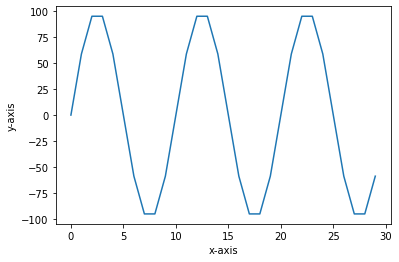

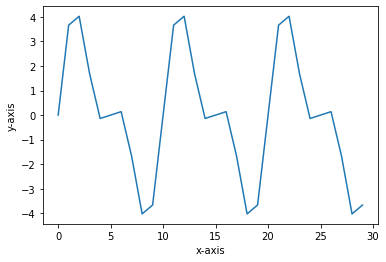

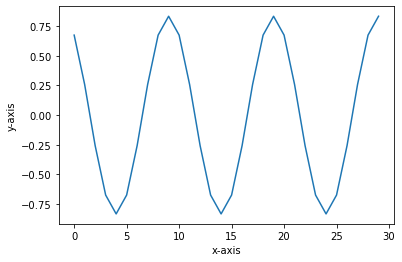

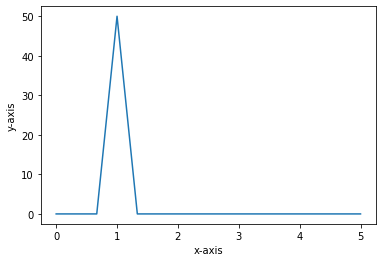

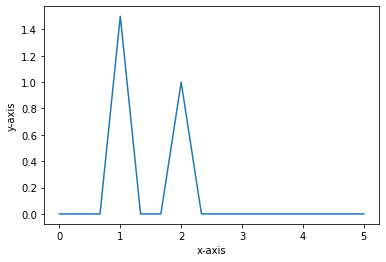

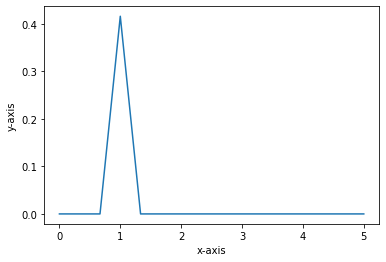

In [92]:
# Calculate Circular correlation
corr, freq, abs_ = same_len_corr(sig1, sig2, sampling_rate)

# plots
plot_signal(sig1, [])
plot_signal(sig2, [])
plot_signal(corr, [])

plot_signal(sig1_a, f1)
plot_signal(sig2_a, f2)
plot_signal(abs_, freq)

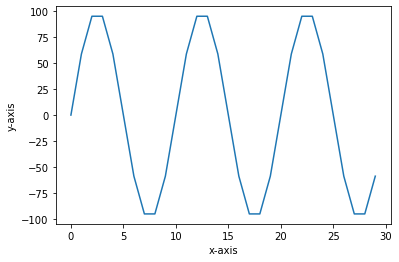

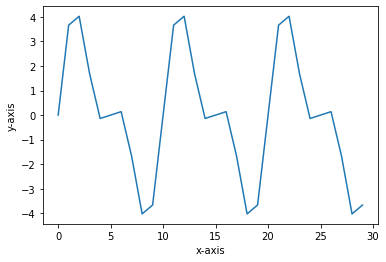

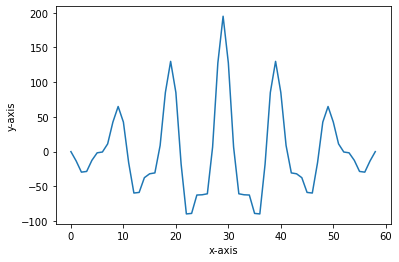

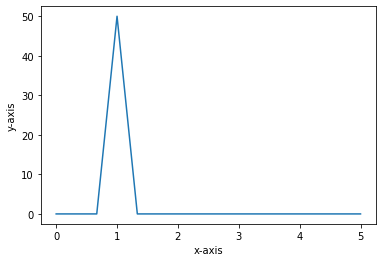

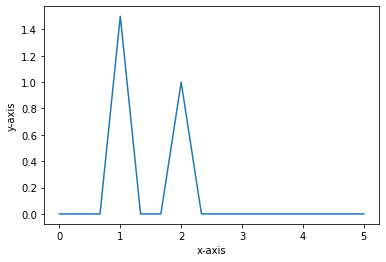

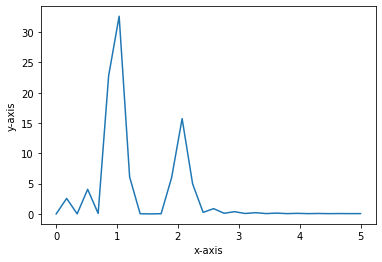

In [95]:
# Calculate Linear correlation
corr, freq, abs_ = search_corr(sig2, sig2, sampling_rate)

# plots
plot_signal(sig1, [])
plot_signal(sig2, [])
plot_signal(corr, [])

plot_signal(sig1_a, f1)
plot_signal(sig2_a, f2)
plot_signal(abs_, freq)

In [112]:
from scipy.stats import ttest_ind

data = {
'a': [0.9, 1.0, 1.1, 1.2],
'b': [1.0, 1.1, 1.2, 1.3],
'c': [4.9, 5.0, 5.1, 5.2],
}

# find p-value for two-tailed test
t, p = ttest_ind(data['a'][:2], data['b'][:2])
p

0.292893218813452

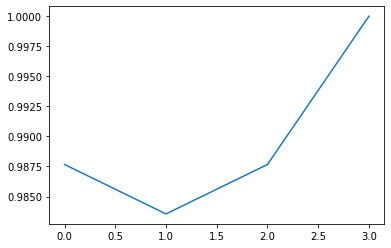

In [116]:
plt.plot(circular_corr(data['a'], data['b']))